In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()  

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [9]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [10]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [11]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [12]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

C:\Users\Taraksh Goyal\AppData\Local\Temp\ipykernel_22612\121436121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)
C:\Users\Taraksh Goyal\AppData\Local\Temp\ipykernel_22612\121436121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [13]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID', axis=1, inplace=True)

In [15]:
df['TotalVisiting'] = df['NumberOfTrips'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfTrips', 'NumberOfChildrenVisiting'], inplace=True)

In [16]:
num_features=[feature for feature in df.columns if df[feature].dtype != 'O']
print(len(num_features))

12


In [17]:
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(len(cat_features))

6


In [18]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print(len(discrete_features))

9


In [19]:
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(len(continuous_features))

3


In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'], axis=1)
y=df['ProdTaken']

In [21]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1,2,1,Manager,20993.0,1.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,0,3,1,Manager,20130.0,4.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,1,3,0,Executive,17090.0,7.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,0,5,1,Executive,18468.0,1.0


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [24]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [26]:
X_train=preprocessor.fit_transform(X_train)

In [27]:
X_test=preprocessor.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [37]:
models={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)
    print(f"Model: {list(models.keys())[i]}")
    print(f"Train Accuracy: {model_train_accuracy}")
    print(f"Train F1 Score: {model_train_f1}")
    print(f"Train Precision: {model_train_precision}")
    print(f"Train Recall: {model_train_recall}")
    print(f"Train ROC AUC: {model_train_roc_auc}")
    print(f"Test Accuracy: {model_test_accuracy}")
    print(f"Test F1 Score: {model_test_f1}")
    print(f"Test Precision: {model_test_precision}")
    print(f"Test Recall: {model_test_recall}")
    print(f"Test ROC AUC: {model_test_roc_auc}")

Model: Decision Tree
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train ROC AUC: 1.0
Test Accuracy: 0.901840490797546
Test F1 Score: 0.746031746031746
Test Precision: 0.7540106951871658
Test Recall: 0.7382198952879581
Test ROC AUC: 0.8398850429425813
Model: Random Forest
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train ROC AUC: 1.0
Test Accuracy: 0.9233128834355828
Test F1 Score: 0.7634069400630915
Test Precision: 0.9603174603174603
Test Recall: 0.6335078534031413
Test ROC AUC: 0.8135773066253318


c:\Users\Taraksh Goyal\Desktop\coding\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoostClassifier
Train Accuracy: 0.8537084398976982
Train F1 Score: 0.48
Train Precision: 0.7115902964959568
Train Recall: 0.36213991769547327
Train ROC AUC: 0.664251348347894
Test Accuracy: 0.8343558282208589
Test F1 Score: 0.4295774647887324
Test Precision: 0.6559139784946236
Test Recall: 0.3193717277486911
Test ROC AUC: 0.6393554953864167


In [38]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
ada_params={"n_estimators": [50, 60, 70,80, 90],
            "algorithm": ['SAMME', 'SAMME.R'],}
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [40]:
randomcv_model=[
    ("RF", RandomForestClassifier(),rf_params),
    ("AdaBoost", AdaBoostClassifier(),ada_params)
]

In [41]:
randomcv_model

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AdaBoost',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [42]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_model:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"Model: {model_name}, Best Params: {model_param[model_name]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Taraksh Goyal\Desktop\coding\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
66 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Taraksh Goyal\Desktop\coding\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Taraksh Goyal\Desktop\coding\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Taraksh Goyal\Desktop\coding\myenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: RF, Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
Model: AdaBoost, Best Params: {'n_estimators': 50, 'algorithm': 'SAMME'}


In [43]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=None,max_features=7),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, algorithm='SAMME')
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_pred)
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_pred)
    print(f"Model: {list(models.keys())[i]}")
    print(f"Train Accuracy: {model_train_accuracy}")
    print(f"Train F1 Score: {model_train_f1}")
    print(f"Train Precision: {model_train_precision}")
    print(f"Train Recall: {model_train_recall}")
    print(f"Train ROC AUC: {model_train_roc_auc}")
    print(f"Test Accuracy: {model_test_accuracy}")
    print(f"Test F1 Score: {model_test_f1}")
    print(f"Test Precision: {model_test_precision}")
    print(f"Test Recall: {model_test_recall}")
    print(f"Test ROC AUC: {model_test_roc_auc}")

Model: Random Forest
Train Accuracy: 1.0
Train F1 Score: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train ROC AUC: 1.0
Test Accuracy: 0.9202453987730062
Test F1 Score: 0.75625
Test Precision: 0.937984496124031
Test Recall: 0.6335078534031413
Test ROC AUC: 0.8116713345795884
Model: AdaBoostClassifier
Train Accuracy: 0.8452685421994884
Train F1 Score: 0.3624868282402529
Train Precision: 0.7818181818181819
Train Recall: 0.23593964334705075
Train ROC AUC: 0.6104250244399511
Test Accuracy: 0.8374233128834356
Test F1 Score: 0.3614457831325301
Test Precision: 0.7758620689655172
Test Recall: 0.2356020942408377
Test ROC AUC: 0.6095418349221978


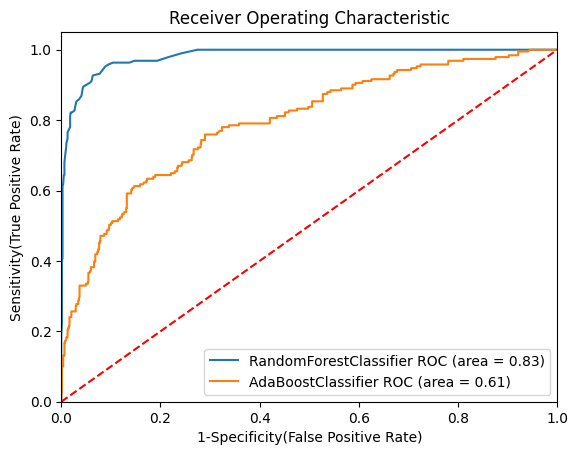

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
auc_models=[{
        'label': 'RandomForestClassifier',
        'model': RandomForestClassifier(n_estimators=100,min_samples_split=2,max_depth=None,max_features=7),
        'auc': 0.8279369598914295
    },
    {
        'label': 'AdaBoostClassifier',
        'model': AdaBoostClassifier(n_estimators=50, algorithm='SAMME'),
        'auc': 0.6095418349221978
    }

]
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 